# Forest Area Case Study

In this Exploratory Data Analysis Project, I analyzed Recorded Forest Area Data provided by India State of Forest Report(ISFR) for the year of 2019 & 2021.

**Note:** 
1. All the areas are in sq km.
2. Abbreviations used are as follows:
    * RF = Reserved Forest
    * PF = Protected Forest
    * UF = Unclasses Forest
    * GA = Geographical Area

In [35]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**DATA CLEANING**

In [59]:
#for reading csv dataset
df = pd.read_csv('ISFR2021.csv')
df.shape

(36, 7)

In [37]:
#for getting info about all the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S. No.    36 non-null     int64  
 1   State/UT  36 non-null     object 
 2   GA        35 non-null     float64
 3   RF        36 non-null     int64  
 4   PF        36 non-null     int64  
 5   UF        36 non-null     int64  
 6   Total     36 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.1+ KB


In [38]:
#checking for null values
pd.isnull(df).sum()

S. No.      0
State/UT    0
GA          1
RF          0
PF          0
UF          0
Total       0
dtype: int64

In [39]:
#for getting statastical information
df.describe()

,S. No.,GA,RF,PF,UF,Total
count,36.000000,35.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,93927.685714,12285.444444,5896.083333,3354.250000,21535.777778
std,10.535654,98447.827141,15279.541894,9060.040493,5392.734924,22514.439022
min,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,9.750000,13532.500000,245.250000,10.250000,9.750000,5151.750000
50%,18.500000,55673.000000,5532.500000,1575.000000,1362.500000,14631.500000
75%,27.250000,145449.500000,18528.750000,6245.500000,4872.500000,33961.750000
max,36.000000,342239.000000,61886.000000,31098.000000,27312.000000,94689.000000


**EXPLORATORY DATA ANALYSIS**

**ANALYSING ISFR'2021 DATA :**

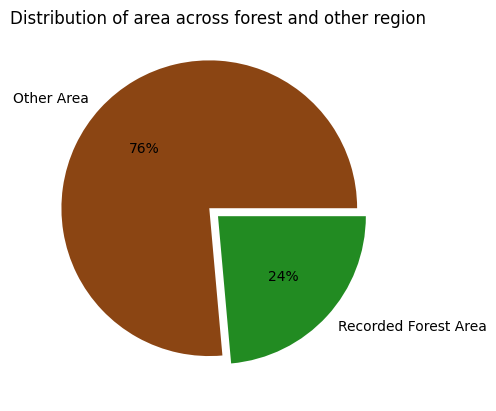

In [40]:
#recorded forest area in terms of total geographical area
total_LA = df.GA.sum()  - df.Total.sum() 
total_RFA = df.Total.sum()

values = [total_LA, total_RFA]
label = ('Other Area','Recorded Forest Area')
colors = ('saddlebrown','forestgreen')
myexplode = [0.08, 0]

plt.pie(values, labels = label, colors=colors, autopct='%.0f%%', explode = myexplode)

plt.title('Distribution of area across forest and other region')

plt.show() 

In [61]:
#to express total recorded forest area as a percentage of Geographical Area rounded upto two decimal places
df['% of GA'] = (df.Total/df.GA)*100
df['% of GA'] = df['% of GA'].round(2)
df

,S. No.,State/UT,GA,RF,PF,UF,Total,% of GA
0,1,Andhra Pradesh,162968.0,31959,5069,230,37258,22.86
1,2,Arunachal Pradesh,83743.0,12371,11857,27312,51540,61.55
2,3,Assam,78438.0,17864,0,8972,26836,34.21
3,4,Bihar,94163.0,693,6183,566,7442,7.90
4,5,Chhattisgarh,135192.0,25897,24036,9883,59816,44.25
5,6,Delhi,1483.0,78,25,0,103,6.95
6,7,Goa,3702.0,119,755,397,1271,34.33
7,8,Gujarat,196244.0,14574,2898,4398,21870,11.14
8,9,Haryana,44212.0,249,1158,152,1559,3.53
9,10,Himachal Pradesh,55673.0,1883,28887,7178,37948,68.16


In [62]:
#for selecting top 5 states having highest percentage of forest area
df.sort_values(['% of GA','State/UT'],ascending = False).head(5) 

,S. No.,State/UT,GA,RF,PF,UF,Total,% of GA
29,30,Andaman and Nicobar Islands,8249.0,5613,1558,0,7171,86.93
22,23,Sikkim,7096.0,5452,389,0,5841,82.31
15,16,Manipur,22327.0,984,3254,13180,17418,78.01
27,28,Uttarakhand,53483.0,26547,9885,1568,38000,71.05
9,10,Himachal Pradesh,55673.0,1883,28887,7178,37948,68.16


In [63]:
#for selecting top 5 states having lowest percentage of forest area
df.sort_values(['% of GA','State/UT'],ascending = True).head(5) 

,S. No.,State/UT,GA,RF,PF,UF,Total,% of GA
34,35,Lakshadweep,30.0,0,0,0,0,0.00
35,36,Puducherry,490.0,0,2,11,13,2.65
8,9,Haryana,44212.0,249,1158,152,1559,3.53
20,21,Punjab,50362.0,44,1137,1903,3084,6.12
5,6,Delhi,1483.0,78,25,0,103,6.95


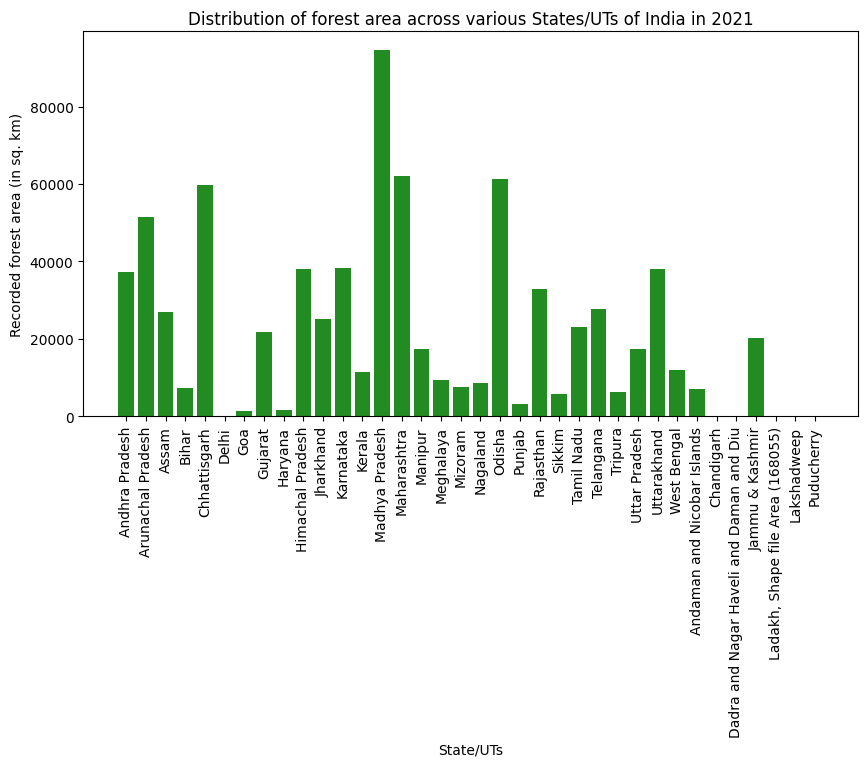

In [43]:
#bar chart representing contribution of every State/UT in Total forest area for the year 2021
keys = df['State/UT']
values = df['Total']

fig = plt.figure(figsize = (10, 5))

plt.bar(keys, values, color ='forestgreen', width = 0.8)

plt.xlabel('State/UTs')
plt.ylabel('Recorded forest area (in sq. km)')
plt.title('Distribution of forest area across various States/UTs of India in 2021')

plt.xticks(rotation = 90)

plt.show()

In [45]:
#pie chart representing distribution of forest area among various classes 
cols = ['RF', 'PF', 'UF']
pie = df[cols].sum()
pie

RF    442276
PF    212259
UF    120753
dtype: int64

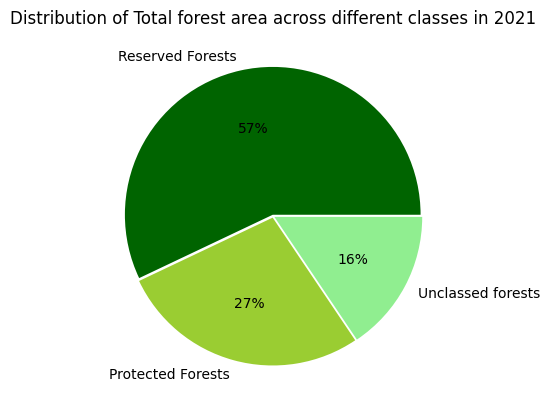

In [47]:
values = np.array([ 442276, 212259, 120753])
label = ['Reserved Forests', 'Protected Forests', 'Unclassed forests']
colors = ['darkgreen', 'yellowgreen', 'lightgreen']
myexplode = [0.01, 0.01,0.01]

plt.pie(values, labels = label, colors=colors, autopct='%.0f%%', explode=myexplode)

plt.title('Distribution of Total forest area across different classes in 2021')

plt.show() 

**ANALYSING ISFR'2019 DATA :**

In [48]:
#reading ISFR 2019 data
df2 = pd.read_csv('ISFR2019.csv')
df2

,S. No.,State/UT,GA,RF,PF,UF,Total
0,1,Andhra Pradesh,162968,31959,5069,230,37258
1,2,Arunachal Pradesh,83743,10589,9779,31039,51407
2,3,Assam,78438,17864,0,8968,26832
3,4,Bihar,94163,693,6183,1,6877
4,5,Chhattisgarh,135192,25782,24036,9954,59772
5,6,Delhi,1483,78,24,0,102
6,7,Goa,3702,253,0,972,1225
7,8,Gujarat,196244,14373,2886,4388,21647
8,9,Haryana,44212,249,1158,152,1559
9,10,Himachal Pradesh,55673,1898,33130,2005,37033


In [129]:
#to express total recorded forest area as a percentage of Geographical Area rounded upto two decimal places
df2['% of GA'] = (df2.Total/df2.GA)*100
df2['% of GA'] = df2['% of GA'].round(2)
df2

,S. No.,State/UT,GA,RF,PF,UF,Total,% of GA
0,1,Andhra Pradesh,162968,31959,5069,230,37258,22.86
1,2,Arunachal Pradesh,83743,10589,9779,31039,51407,61.39
2,3,Assam,78438,17864,0,8968,26832,34.21
3,4,Bihar,94163,693,6183,1,6877,7.30
4,5,Chhattisgarh,135192,25782,24036,9954,59772,44.21
5,6,Delhi,1483,78,24,0,102,6.88
6,7,Goa,3702,253,0,972,1225,33.09
7,8,Gujarat,196244,14373,2886,4388,21647,11.03
8,9,Haryana,44212,249,1158,152,1559,3.53
9,10,Himachal Pradesh,55673,1898,33130,2005,37033,66.52


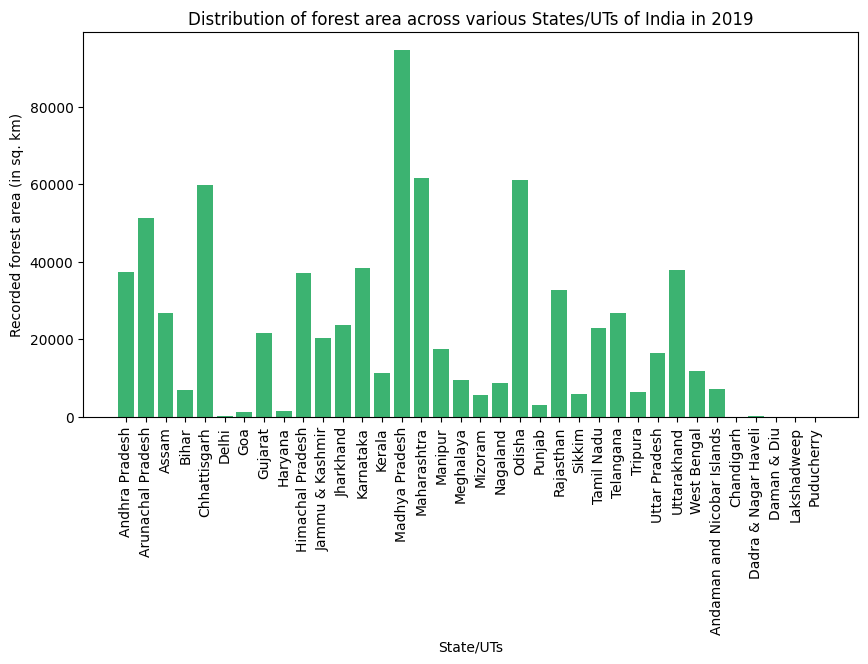

In [49]:
#bar chart representing contribution of every State/UT in Total forest area for the year 2019
keys = df2['State/UT']
values = df2['Total']

fig = plt.figure(figsize = (10, 5))

plt.bar(keys, values, color ='mediumseagreen', width = 0.8)

plt.xlabel('State/UTs')
plt.ylabel('Recorded forest area (in sq. km)')
plt.title('Distribution of forest area across various States/UTs of India in 2019')

plt.xticks(rotation = 90)

plt.show()

**COMPARING ISFR 2019 & 2021 DATA**

[Text(0, 0, '767419'), Text(0, 0, '775288')]

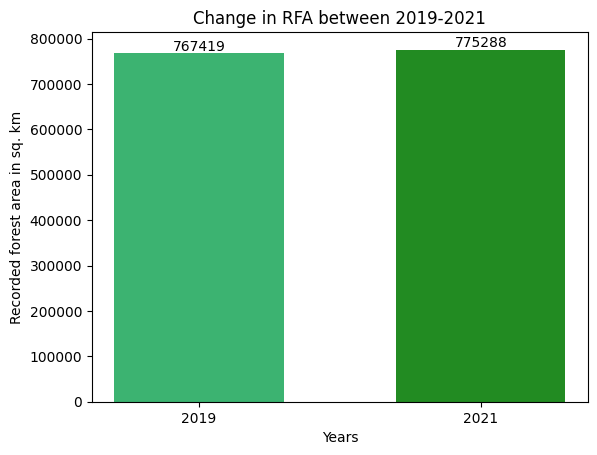

In [50]:
#change in recorded forest area (RFA) between 2019-2021
RFA21 = df.Total.sum()
RFA19 = df2.Total.sum()

Values = [RFA19, RFA21]
year = ['2019', '2021']
colors = ('mediumseagreen','forestgreen')
bar = plt.bar(year, Values, color= colors, width = 0.6,  linewidth=1)

plt.xlabel('Years')
plt.ylabel('Recorded forest area in sq. km')
plt.title('Change in RFA between 2019-2021')
plt.bar_label(bar, labels=Values, label_type = 'edge') 

In [51]:
#state-wise percentage change in RFA between 2019-2021
a = df[['State/UT','Total']]
a.rename(columns = {'Total':'y2021'}, inplace = True)
b = df2[['State/UT','Total']]
b.rename(columns = {'Total':'y2019'}, inplace = True)
final = a.merge(b, on = 'State/UT')
final['% change in RFA'] = ((final.y2021 - final.y2019)/final.y2019)*100
final

C:\Users\HP\AppData\Local\Temp\ipykernel_2112\3994753123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.rename(columns = {'Total':'y2021'}, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2112\3994753123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.rename(columns = {'Total':'y2019'}, inplace = True)


,State/UT,y2021,y2019,% change in RFA
0,Andhra Pradesh,37258,37258,0.000000
1,Arunachal Pradesh,51540,51407,0.258720
2,Assam,26836,26832,0.014908
3,Bihar,7442,6877,8.215792
4,Chhattisgarh,59816,59772,0.073613
5,Delhi,103,102,0.980392
6,Goa,1271,1225,3.755102
7,Gujarat,21870,21647,1.030166
8,Haryana,1559,1559,0.000000
9,Himachal Pradesh,37948,37033,2.470769


**FOR CHHATTISGARH :** 

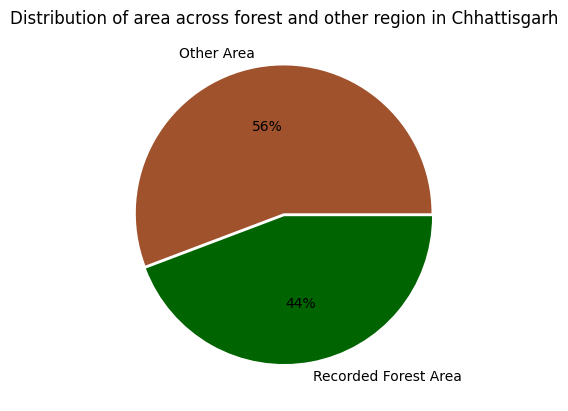

In [52]:
#recorded forest area in terms of total geographical area
cg21 = df[df['State/UT'] == 'Chhattisgarh']
total_LACG = cg21.GA.sum() - cg21.Total.sum()
total_RFACG = cg21.Total.sum()

values = [total_LACG, total_RFACG]
label = ('Other Area','Recorded Forest Area')
colors = ('sienna','darkgreen')
myexplode = [0.02, 0]

plt.pie(values, labels = label, colors=colors, autopct='%.0f%%', explode=myexplode)

plt.title('Distribution of area across forest and other region in Chhattisgarh')

plt.show() 

In [53]:
#pie chart representing distribution of forest area among various classes 
#for accessing 2021 data
cg21 = df[df['State/UT'] == 'Chhattisgarh']
cols = ['RF', 'PF', 'UF']
pie = cg21[cols].sum()
pie

RF    25897
PF    24036
UF     9883
dtype: int64

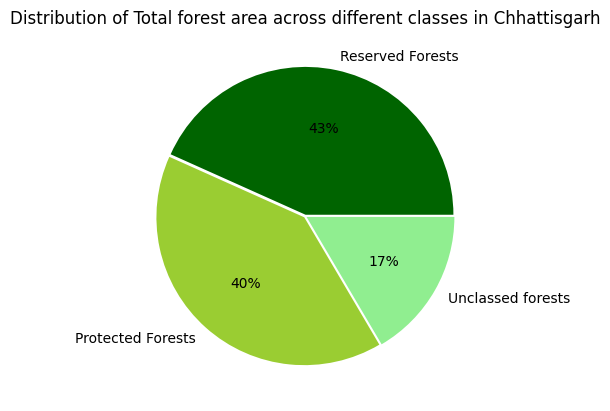

In [54]:
values = np.array([ 25897, 24036, 9883])
label = ['Reserved Forests', 'Protected Forests', 'Unclassed forests']
colors = ['darkgreen', 'yellowgreen', 'lightgreen']
myexplode = [0.01, 0.01, 0.01]

plt.pie(values, labels = label, colors=colors, autopct='%.0f%%', explode=myexplode)

plt.title('Distribution of Total forest area across different classes in Chhattisgarh')

plt.show() 

In [55]:
#for accessing 2019 data
cg19 = df2[df2['State/UT'] == 'Chhattisgarh']
cg19

,S. No.,State/UT,GA,RF,PF,UF,Total
4,5,Chhattisgarh,135192,25782,24036,9954,59772


Text(0.5, 1.0, 'Change in RFA across different classes of forest between year 2019-2021')

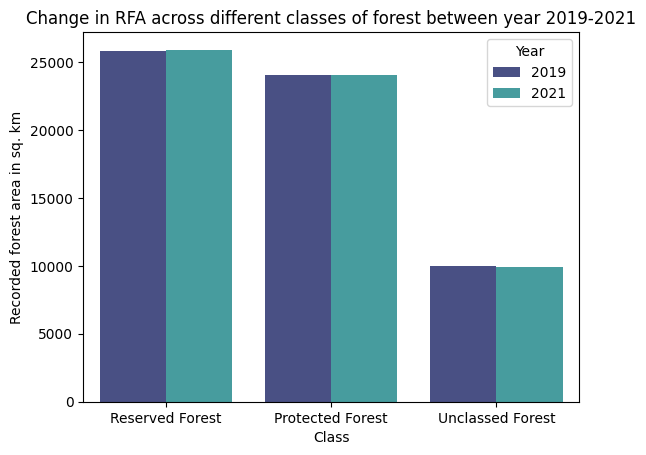

In [56]:

df = pd.DataFrame([['Reserved Forest', '2019', 25782], ['Protected Forest', '2019', 24036], ['Unclassed Forest', '2019', 9954], ['Reserved Forest', '2021', 25897], ['Protected Forest', '2021', 24036], ['Unclassed Forest', '2021', 9883]], columns=['Class', 'Year', 'Value'])

sns.barplot(data=df, x='Class', y='Value', hue='Year', palette  ='mako' )

plt.ylabel('Recorded forest area in sq. km')
plt.title('Change in RFA across different classes of forest between year 2019-2021')
